# Web Scrapping 

In [88]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [89]:
import pandas as pd
df_laptop = pd.DataFrame(columns = ['product_name','product_price','ship_from', 'review_count','brand','option'])
page = 1
laptop_count = 0
while (laptop_count <=100) & (page <= 100):
    req = requests.get(f"https://www.geekbuying.com/search?keyword=laptop&page={page}")
    soup = BeautifulSoup(req.content, 'html.parser')
    no_of_laptops = len(soup.find_all('a',category='Laptops'))
    laptop_count = laptop_count + no_of_laptops
    for i in soup.find_all('a',category='Laptops'):
      laptop_url = i.get('href')
      lap_data = requests.get(laptop_url)
      lap_soup = BeautifulSoup(lap_data.content, 'html.parser')
      product_name = lap_soup.find_all('div', class_="product_name")[0].find_all('h1')[0].text
      product_price = lap_soup.find_all('div', class_="app_price")[0].find(class_="_appPrice").text
      ship_from = lap_soup.find_all('dl', class_="property clearfix")[0].find('span').text
      review_count = int(lap_soup.find_all('a', class_="review_nums")[0].find('i').text)
      if lap_soup.find('span',class_="brand_name").find('a') == None:
        brand = 'NA'
      else:
        brand = lap_soup.find('span',class_="brand_name").find('a').text
      if len(lap_soup.find_all('dl',class_ = 'property'))<2:
        option = 'NA'
      else:
        option = lap_soup.find_all('dl',class_ = 'property')[1].find(class_="attr active").find('a').text.replace('\n','')
      #df_laptop.iloc[len(df_laptop)] = [product_name,product_price,ship_from, review_count,brand,option]
      df_laptop = df_laptop.append({'product_name':product_name ,'product_price': product_price,'ship_from': ship_from,'review_count':review_count,'brand':brand,'option':option},ignore_index=True)
    page = page + 1



In [90]:
df_laptop

,product_name,product_price,ship_from,review_count,brand,option
0,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",$299.99,China,4,AlldoCube,12GB+256GB
1,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",$299.99,China,4,AlldoCube,12GB+256GB
2,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,$1199.00,China,0,One Netbook,EU
3,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,$1199.00,China,0,One Netbook,EU
4,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black
5,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black
6,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black
7,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black
8,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black
9,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black


In [91]:
df_laptop.to_csv('Laptop_data.csv',index=False)

# Data Preprocessing

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('/content/Laptop_data.csv')

In [94]:
df.shape

(38, 6)

In [95]:
df.head()

,product_name,product_price,ship_from,review_count,brand,option
0,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",$299.99,China,4,AlldoCube,12GB+256GB
1,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",$299.99,China,4,AlldoCube,12GB+256GB
2,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,$1199.00,China,0,One Netbook,EU
3,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,$1199.00,China,0,One Netbook,EU
4,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,$1159.00,China,0,One Netbook,Black


In [96]:
df.dtypes # Checking the datatypes

product_name     object
product_price    object
ship_from        object
review_count      int64
brand            object
option           object
dtype: object

In [97]:
df['ship_from'].unique()

array(['China', 'Europe-4'], dtype=object)

In [98]:
df['brand'].unique()

array(['AlldoCube', 'One Netbook', nan, 'KUU'], dtype=object)

In [99]:
df['option'].unique()

array(['12GB+256GB', 'EU', 'Black', 'White', '12GB+512GB', 'US', 'JP',
       'J4105', '16GB + 256GB', 'N3350', '12GB + 256GB', nan],
      dtype=object)

In [100]:
df['product_price'].isnull().sum()

0

In [101]:

prices = []
for i in df['product_price']:
  i = i.replace('$','')
  i = float(i)
  prices.append(i)

In [102]:
df['product_price'] = prices

In [103]:
df

,product_name,product_price,ship_from,review_count,brand,option
0,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",299.99,China,4,AlldoCube,12GB+256GB
1,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",299.99,China,4,AlldoCube,12GB+256GB
2,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,1199.00,China,0,One Netbook,EU
3,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,1199.00,China,0,One Netbook,EU
4,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black
5,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black
6,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black
7,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black
8,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black
9,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black


In [104]:
df.to_csv('Laptop_new.csv') # Save it into a CSV file

# Exploratory Data Analysis

In [105]:
df = pd.read_csv('/content/Laptop_new.csv')

In [106]:
df.shape

(38, 7)

In [107]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(38, 6)

In [108]:
df.head()

,product_name,product_price,ship_from,review_count,brand,option
0,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",299.99,China,4,AlldoCube,12GB+256GB
1,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",299.99,China,4,AlldoCube,12GB+256GB
2,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,1199.00,China,0,One Netbook,EU
3,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,1199.00,China,0,One Netbook,EU
4,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black


In [ ]:
df.columns

Index(['product_name', 'product_price', 'ship_from', 'review_count', 'brand',
       'option'],
      dtype='object')

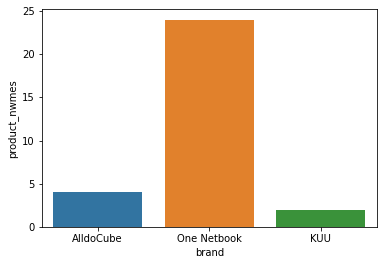

In [ ]:
sns.countplot(x='brand',data=df)

plt.xlabel('brand') 
plt.ylabel('product_nwmes') 

plt.show()

In [ ]:
df.groupby('brand')['product_price'].mean()

brand
AlldoCube       324.99
KUU               0.00
One Netbook    1104.00
Name: product_price, dtype: float64

In [ ]:
pd.pivot_table(df, index = ['ship_from', 'review_count','brand','option'], values = 'product_price').sort_values('brand', ascending = False)

product_price
ship_from review_count brand       option                   
China     0            One Netbook Black             1159.00
                                   EU                1049.00
                                   JP                1049.00
                                   US                1049.00
                                   White             1159.00
          4            AlldoCube   12GB+256GB         299.99
                                   12GB+512GB         349.99

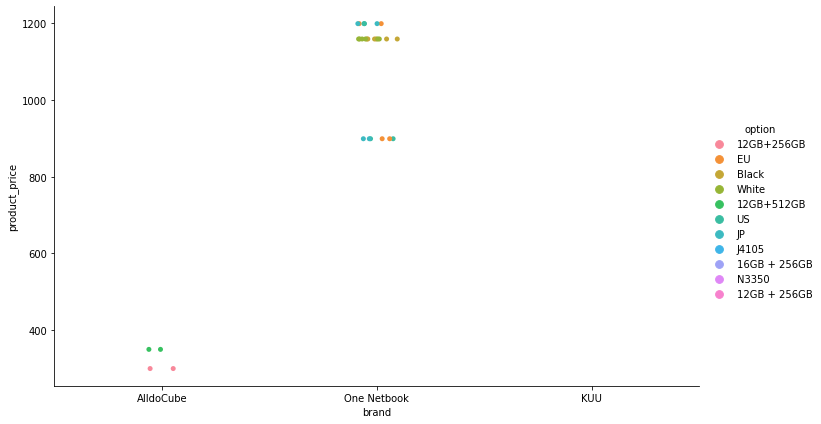

In [ ]:
sns.catplot(x="brand", y="product_price", hue="option", data=df,height=6, aspect=10/6)

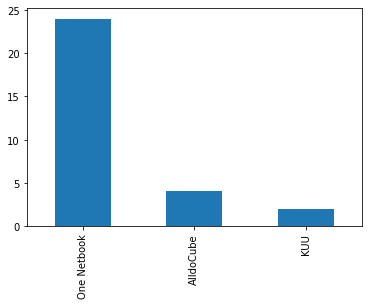

In [ ]:
df['brand'].value_counts().plot(kind='bar')

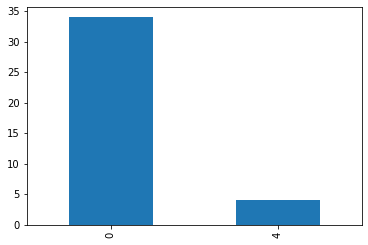

In [ ]:
df['review_count'].value_counts().plot(kind='bar')

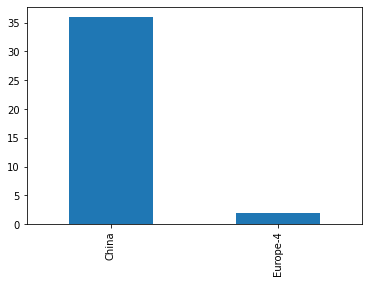

In [ ]:
df['ship_from'].value_counts().plot(kind='bar')

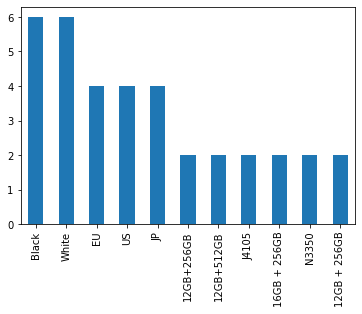

In [ ]:
df['option'].value_counts().plot(kind='bar')

In [ ]:
#Observations:
#One Notebook has high priced laptops as compared to others.
#Most of the laptops are shipped from China

#Observations:
1. One Notebook has high priced laptops as compared to others brands.
2. Most of the laptops are shipped from China.
3. Majority of the laptos has 0 reviews.

# Encoding

In [116]:
dummy_encoded= pd.get_dummies(df[['ship_from','brand']], drop_first=True)
dummy_encoded.head()

,ship_from_Europe-4,brand_KUU,brand_One Netbook
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [112]:
df.columns

Index(['product_name', 'product_price', 'ship_from', 'review_count', 'brand',
       'option'],
      dtype='object')

In [113]:
df_model = pd.concat([df, dummy_encoded] , axis=1).reset_index(drop=True)

In [115]:
df_model.head()

,product_name,product_price,ship_from,review_count,brand,option,ship_from_Europe-4,brand_KUU,brand_One Netbook
0,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",299.99,China,4,AlldoCube,12GB+256GB,0,0,0
1,"ALLDOCUBE GTBook 15 Laptop, 15.6 inch FHD IPS ...",299.99,China,4,AlldoCube,12GB+256GB,0,0,0
2,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,1199.00,China,0,One Netbook,EU,0,0,1
3,One Netbook 4S Platinum 2 in 1 Laptop Intel Co...,1199.00,China,0,One Netbook,EU,0,0,1
4,ONE Netbook OneXPlayer 2 Game Console 8.4'' 2K...,1159.00,China,0,One Netbook,Black,0,0,1


In [128]:
X = df_model.drop(['product_price',"product_name",'ship_from','option','brand'] ,axis=1).reset_index(drop=True)
Y = df_model['product_price'].values

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   review_count        38 non-null     int64
 1   ship_from_Europe-4  38 non-null     uint8
 2   brand_KUU           38 non-null     uint8
 3   brand_One Netbook   38 non-null     uint8
dtypes: int64(1), uint8(3)
memory usage: 546.0 bytes


# Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [133]:
lm.score(X_test,Y_test)

0.9537486829013544

In [134]:
y_linear = lm.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_linear,Y_test)

70.2631578947371

In [135]:
from sklearn.metrics import r2_score
r2_score(y_linear,Y_test)

0.9571287634728086

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train,Y_train)
np.mean(cross_val_score(lm_l,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3)) 

-145.46159534226734

In [ ]:
y_lasso = lm_l.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_lasso,Y_test)

72.2869910696084

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_lasso,Y_test)

0.9570200685431494

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
np.mean(cross_val_score(rf,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3))

-142.7717

In [ ]:
ypred_rf = rf.predict(X_test)
print(mean_absolute_error(Y_test,ypred_rf))
print(r2_score(ypred_rf,Y_test))

31.82987500000001
0.9806676311895648


In [ ]:
ypred_rf

array([  23.18  ,  189.7592, 1159.    , 1159.    ,    6.4998,  916.6   ,
       1159.    ,  916.6   ])

# Tuning the model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [ ]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
gs.best_score_ 
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=120,
                      random_state=0)

In [ ]:
tpred_rf=gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,tpred_rf)

61.53318750000002

In [ ]:
from sklearn.metrics import r2_score
r2_score(tpred_rf,Y_test)

0.9483699954378819

# XGBoost

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 0)
regressor.fit(X_train,Y_train)

[02:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
 y_xgb = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_xgb,Y_test)

0.47217828035354614

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_xgb,Y_test)

0.9999989003645111

# Grid Search

In [ ]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8299087501924276
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
y_xgb1 = xgb_grid.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_xgb1,Y_test)

49.90750050544739

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_xgb1,Y_test)

0.9754793572231283

# Conclusion: 
1. I have tried Linear regression, Lasso regression, Random Forest regressor, XGBoost regressor for the problem of laptop price prediction.
2. XGBoost is the best model as it gave least Mean Absolute Error.